# Problem 2

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from platform import python_version

In [2]:
# use binomial dis to prove consistency and asympototic normality
sample_size = 1000 # Choose the number of observations to show consistency
number_of_samples = 1000 # This is for the CLT
prob_success = .2         # prob of success for the Binomial distribution
number_trials = 50        # number of trials for the Binomilal distribution
true_mean = prob_success*number_trials
true_var = prob_success*(1-prob_success)*number_trials

### (6) Consistency

In [3]:
true_mean_vector = np.ones(sample_size) * true_mean
true_var_vector = np.ones(sample_size) * true_var
sz = sample_size
sample_mean_vector = np.ones(sz)
sample_var_vector = np.ones(sz)
sample = np.random.binomial(number_trials,prob_success,sz)
# compute sample mean by adding one observation at the time
for i in range(sz):
  sample_mean_vector[i] = np.mean(sample[:i+1])
  sample_var_vector[i] = np.var(sample[:i+1])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


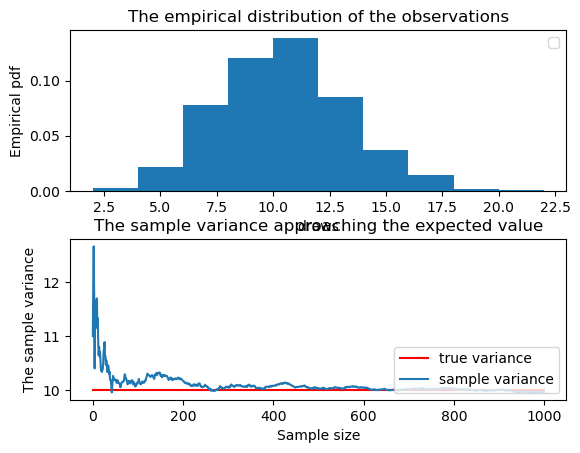

In [4]:
# First, the histogram of the simulated data
fig, axis = plt.subplots(2,1)
axis[0].set_xlabel('draws')
axis[0].set_ylabel('Empirical pdf')
axis[0].hist(sample,density=True)  # adjust 'bins' for smoother graph
axis[0].set_title('The empirical distribution of the observations')
axis[0].legend(loc = 'upper right' )

# Second, the convergence of the sample mean to the true mean
axis[1].set_xlabel('Sample size')
axis[1].set_ylabel('The sample variance')
axis[1].plot(true_mean_vector, color='red', label = 'true variance')
axis[1].plot(sample_mean_vector, label = 'sample variance')
axis[1].set_title('The sample variance approaching the expected value')
axis[1].legend(loc = 'lower right' )
fig.subplots_adjust(hspace=0.3)

As we can see in the graphs, the sample variance converges to the true one as the sample size goes up -> the sample variance is consistent to the true variance.

### (7) Asymptotic normality

In [5]:
smaller_sample_size = 10
small_sample = np.ones([smaller_sample_size, number_of_samples]) #number_of_samples=1000
sz = small_sample.shape
larger_sample = np.ones([sample_size, number_of_samples])
sz1 = larger_sample.shape
X_small = np.random.binomial(number_trials, prob_success, sz)
X_large = np.random.binomial(number_trials, prob_success, sz1)

<function matplotlib.pyplot.show(close=None, block=None)>

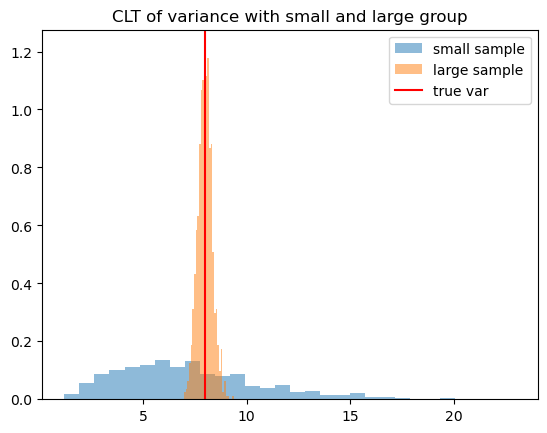

In [6]:
#CLT without standardization
var_small = np.var(X_small, axis=0)
var_large = np.var(X_large, axis=0)
plt.hist(var_small, bins=30, density=True, alpha=0.5, label = 'small sample')
plt.hist(var_large, bins=30, density=True, alpha=0.5, label = 'large sample')
plt.title('CLT of variance with small and large group')
plt.axvline(x=true_var,color='red',label='true var')
plt.legend(loc = 'upper right')
plt.show

By comparing the distribution of sample var of both small and large group, we can find that the larger the sample size is, the more concentrated the sample var is, with a center of true variance.

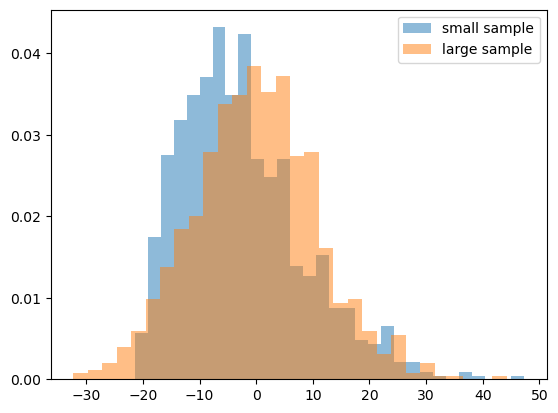

In [7]:
# CLT with standardization factor of (T)**(1/2) and centralization factor of sigma**2
plt.hist(np.sqrt(smaller_sample_size) * (var_small - true_var ), bins=30, density=True, alpha=0.5, label = 'small sample')
plt.hist(np.sqrt(sample_size) * (var_large - true_var), bins=30, density=True, alpha=0.5, label = 'large sample')
plt.legend(loc = 'upper right')

As we can see in the histgram, as the sampel size goes up, the distribution of sample is asymptotically normalized with a central mean of 0.